## Leitura de dados

In [42]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# read text file into pandas DataFrame
df = pd.read_csv('Data/DATA.txt', header=None, delimiter="   ", names=['GENDER', 'AGE', 'RF', 'SBP', 'HR1','ST', 'HR2', 'CRT', 'KIL', 'EVENT'])

/var/folders/ff/k5l3wypj7s1gqw9qq5mly9w80000gn/T/ipykernel_12184/4035303519.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('Data/DATA.txt', header=None, delimiter="   ", names=['GENDER', 'AGE', 'RF', 'SBP', 'HR1','ST', 'HR2', 'CRT', 'KIL', 'EVENT'])


## Caracterização dos dados

In [43]:
df.head()

,GENDER,AGE,RF,SBP,HR1,ST,HR2,CRT,KIL,EVENT
0,1.0,33.0,0.0,132.0,91.579173,1.0,90.0,0.8,1.0,0.0
1,1.0,69.0,0.0,147.0,52.785861,0.0,52.0,1.4,1.0,0.0
2,1.0,63.0,0.0,142.0,40.692798,1.0,44.0,1.1,3.0,1.0
3,0.0,79.0,0.0,147.0,106.420820,1.0,110.0,0.9,1.0,1.0
4,0.0,61.0,0.0,107.0,82.148302,0.0,80.0,1.1,1.0,0.0


# Separação dados

In [44]:
X = df.drop('EVENT', axis=1)
y = df['EVENT']

## Divisão train/test

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo

In [46]:
# Definir a arquitetura da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


2023-05-25 22:22:51.928837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 3.7807 - accuracy: 0.5151

2023-05-25 22:22:53.149832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 2s 74ms/step - loss: 3.7807 - accuracy: 0.5151 - val_loss: 0.8548 - val_accuracy: 0.6087
Epoch 2/20
12/12 [==============================] - 0s 34ms/step - loss: 1.4412 - accuracy: 0.6137 - val_loss: 1.2698 - val_accuracy: 0.5435
Epoch 3/20
12/12 [==============================] - 0s 31ms/step - loss: 1.1690 - accuracy: 0.5644 - val_loss: 0.7142 - val_accuracy: 0.6630
Epoch 4/20
12/12 [==============================] - 0s 31ms/step - loss: 0.8290 - accuracy: 0.6055 - val_loss: 0.7707 - val_accuracy: 0.6087
Epoch 5/20
12/12 [==============================] - 0s 31ms/step - loss: 0.7011 - accuracy: 0.6137 - val_loss: 0.7067 - val_accuracy: 0.5978
Epoch 6/20
12/12 [==============================] - 0s 30ms/step - loss: 0.6145 - accuracy: 0.6767 - val_loss: 0.6684 - val_accuracy: 0.5761
Epoch 7/20
12/12 [==============================] - 0s 32ms/step - loss: 0.5729 - accuracy: 0.7233 - val_loss: 0.5496 - val_accuracy: 0.8261
Epoch 8/20
12/12 [======

In [48]:
# Avaliar o modelo nos dados de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia nos dados de teste: {accuracy}')

3/3 [==============================] - 0s 10ms/step - loss: 0.4217 - accuracy: 0.7935
Acurácia nos dados de teste: 0.79347825050354


## Predição

In [49]:
# Fazer previsões nos dados de teste
# Fazer previsões nos dados de teste
y_pred_prob = model.predict(X_test).flatten()
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

3/3 [==============================] - 0s 14ms/step


2023-05-25 22:23:00.455742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


## Plot

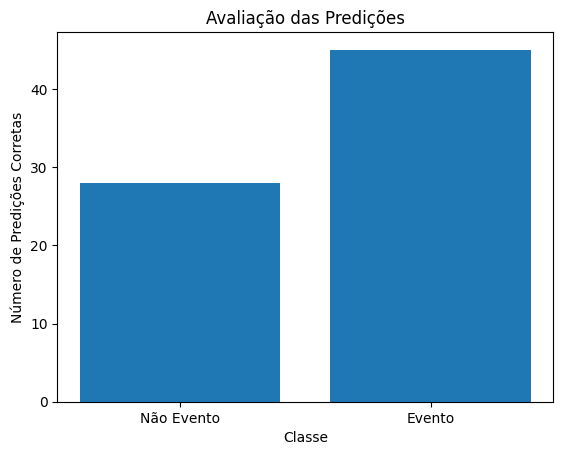

In [50]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Extrair os valores verdadeiros positivos e verdadeiros negativos
tn, fp, fn, tp = cm.ravel()

# Calcular o número de predições corretas para cada classe
correct_predictions = [tn, tp]

# Definir as labels para o plot
labels = ['Não Evento', 'Evento']

# Plotar o número de predições corretas
plt.bar(labels, correct_predictions)
plt.xlabel('Classe')
plt.ylabel('Número de Predições Corretas')
plt.title('Avaliação das Predições')
plt.show()